In [1]:
%matplotlib inline
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 5)   # Change this if figures look ugly. 
rcParams['font.size'] = 16
# IPython Libraries
import IPython
import ipywidgets
from ipywidgets import interact, interactive, interact_manual

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from gradient_descent import Objective, plot_2d_objective, gradient_descent, gradient_descent_momentum
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def plot_data(X, Y, fig=None, options=dict()):
    # fig_data = plt.figure()
    if fig is None:
        fig = plt.subplot(111)
    fig.plot(X, Y, options.get('marker', 'b*'), 
        label=options.get('label', 'Raw data'),
        linewidth=options.get('linewidth', 2),
        fillstyle=options.get('fillstyle', 'full'),
        ms=options.get('size', 8))
    process_plot(fig, options)
    
def plot_fit(X, w, degree, fig=None, options=dict()):
    if fig is None:
        fig = plt.subplot(111)

    x_min = np.min(X)
    x_max = np.max(X)
    dim = w.size - 1
    x_plot = np.reshape(np.linspace(x_min, x_max, 100), [-1, 1])
    Phi = np.concatenate((generate_polynomial(x_plot, degree=degree), generate_trigonometric_polynomial(x_plot, degree=degree)), axis=1)
    y_plot = np.dot(Phi, w)
    fig.plot(x_plot, y_plot, label=options.get('label', 'Regression fit'))
    process_plot(fig, options)
    
def plot_saison(X, w, degree, fig=None, options=dict()):
    if fig is None:
        fig = plt.subplot(111)

    x_min = np.min(X)
    x_max = np.max(X)
    dim = w.size - 1
    x_plot = np.reshape(np.linspace(x_min, x_max, 100), [-1, 1])
    Phi = np.concatenate((generate_polynomial(x_plot, degree=degree), generate_trigonometric_polynomial(x_plot, degree=degree)), axis=1)
    w_ = w.copy()
    w_[:degree+1] = 0
    y_plot = np.dot(Phi, w_)
    fig.plot(x_plot, y_plot, label=options.get('label', 'Regression fit'))
    process_plot(fig, options)

def plot_trend(X, w, degree, fig=None, options=dict()):
    if fig is None:
        fig = plt.subplot(111)

    x_min = np.min(X)
    x_max = np.max(X)
    dim = w.size - 1
    x_plot = np.reshape(np.linspace(x_min, x_max, 100), [-1, 1])
    Phi = np.concatenate((generate_polynomial(x_plot, degree=degree), generate_trigonometric_polynomial(x_plot, degree=degree)), axis=1)
    w_ = w.copy()
    w_[degree+1:] = 0
    y_plot = np.dot(Phi, w_)
    fig.plot(x_plot, y_plot, label=options.get('label', 'Regression fit'))
    process_plot(fig, options)
    
def process_plot(fig, options=dict()):
    if 'x_label' in options.keys():
        fig.set_xlabel(options['x_label'])
    if 'y_label' in options.keys():
        fig.set_ylabel(options['y_label'])
    if 'x_lim' in options.keys():
        fig.set_xlim(options['x_lim'])
    if 'y_lim' in options.keys():
        fig.set_ylim(options['y_lim'])
    if 'title' in options.keys():
        fig.set_title(options['title'])
    if 'legend' in options.keys():
        if options['legend']:
            fig.legend(loc=options.get('legend_loc', 'best'))

In [44]:
df = pd.read_csv('data/quebec_real_estate.csv') 
# data from https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861


In [4]:
df.head()

Date  Province_Median_Price  Province_Average_Time  \
0  2014-01-01                 210000                    135   
1  2014-02-01                 212000                    128   
2  2014-03-01                 210000                    130   
3  2014-04-01                 214000                    120   
4  2014-05-01                 215000                    125   

   Montreal_Median_Price  Montreal_Average_Time  
0                 220000                    124  
1                 225000                    117  
2                 225000                    118  
3                 225000                    113  
4                 226287                    115

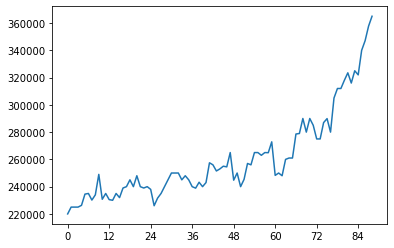

In [5]:
plt.plot(df['Montreal_Median_Price'])
plt.xticks(range(0, len(df), 12))
plt.show()

In [7]:
X = np.arange(len(df))[:, np.newaxis].astype(np.float64)
y = df['Montreal_Median_Price']#.to_numpy()
y = (y - y.mean())/y.std()
y = y[:, np.newaxis]

## Generate polynomial feature matrix

In [8]:
def generate_polynomial(x, degree):
    X = np.ones((x.shape[0], 1))
    for index in range(degree):
        X = np.concatenate([x**(index + 1), X], axis=1)
    return X

def generate_trigonometric_polynomial(x, degree, bias=False, period=12):
    X = np.ones((x.shape[0], 1))
    for index in range(degree):
        X = np.concatenate([np.sin((2*np.pi/period)*x*(index+1)), np.cos((2*np.pi/period)*x*(index+1)), X], axis=1)
    if not bias:
        X = X[:, :-1]
    return X

degree = 3
#Phi = generate_trigonometric_polynomial(X, degree=degree, bias=True)
X_train = X[:int(0.8*len(X))]
y_train = y[:len(X_train)]
Phi = np.concatenate((generate_polynomial(X_train, degree=degree), generate_trigonometric_polynomial(X_train, degree=degree)), axis=1)

## Compute Closed Form Solution

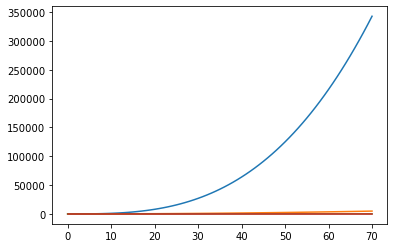

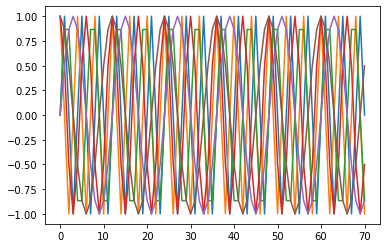

In [9]:
for idx, feat in enumerate(Phi.T):
    plt.plot(feat)
    if idx == degree:
        plt.show()
plt.show()

In [10]:
#y[10] = 10 # create outlier
w_hat = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y_train))

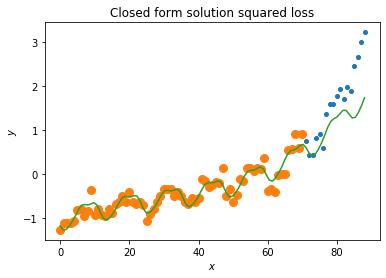

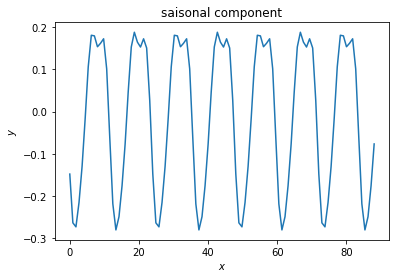

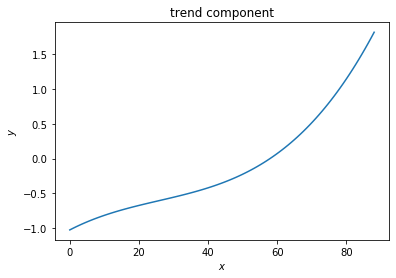

In [11]:
fig = plt.subplot(111)
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'Closed form solution squared loss', 'marker': '.'}
plot_data(X, y, fig=fig, options=plot_opts)
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'Closed form solution squared loss', 'marker': 'o'}
plot_data(X_train, y_train, fig=fig, options=plot_opts)
plot_fit(X, w_hat, degree, fig=fig, options=plot_opts)
plt.show()

fig = plt.subplot(111)
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'saisonal component', 'legend': False}
plot_saison(X, w_hat, degree, fig=fig, options=plot_opts)
plt.show()

fig = plt.subplot(111)
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'trend component', 'legend': False}
plot_trend(X, w_hat, degree, fig=fig, options=plot_opts)
plt.show()

# Question: Can you make this converge? 

## I did not really manage to get this to converge properly, the condition is very bad.

## Huber loss

In [12]:
class HuberLoss(Objective):
    def __init__(self, tau, Phi, y):
        self.tau = tau
        self.Phi = Phi
        self.y = y
        
    def __call__(self, w):
        r = self.y - self.Phi.dot(w)
        mask = np.abs(r) < self.tau
        return np.sum(0.5*r[mask]**2) + np.sum(self.tau*np.abs(r[True^mask] - self.tau**2))
    
    def grad(self, w):
        r = self.y - self.Phi.dot(w)
        mask = np.abs(r) < self.tau
        grad_huber = r.copy()
        grad_huber[True^mask] = self.tau*np.sign(r[True^mask])
        return -self.Phi.T.dot(grad_huber)    

In [14]:
loss_huber = HuberLoss(1.35, Phi, y_train[:,0])

In [15]:
loss_huber(w_hat[:, 0])

0.7566531963787614

In [16]:
np.linalg.cond(Phi.T.dot(Phi))

269456591429.6645

In [40]:
learning_rate = 2e-12
tol = 1e-15
n_steps = 10000
beta = 0.999#0.99999
w_init = np.zeros(Phi.shape[1])# np.random.normal(0, 0.01, Phi.shape[1])

In [41]:
w_grad, w_hist, obj_hist = gradient_descent_momentum(loss_huber, w_init, n_steps=n_steps, beta=beta, learning_rate=learning_rate, tol=tol, normalize=False)

In [42]:
loss_huber(w_grad)

8.622266369907557

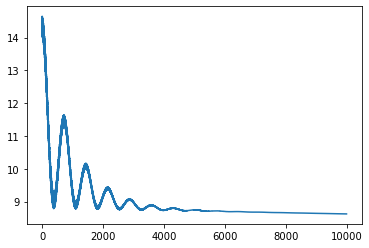

In [43]:
plt.plot(obj_hist)

In [ ]:
fig = plt.subplot(111)
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'Squared loss vs huber loss', 'legend': False}

plot_data(X, y, fig=fig, options=plot_opts)
plot_opts['label'] = 'squared loss'
plot_fit(X, w_hat, degree, fig=fig, options=plot_opts)
plot_opts['label'] = 'huber loss'
plot_fit(X, w_grad[:, np.newaxis], degree, fig=fig, options=plot_opts)
plt.legend()

## Quantile loss

In [40]:
class QuantileLoss(Objective):
    def __init__(self, tau, Phi, y):
        self.tau = tau
        self.Phi = Phi
        self.y = y
        
    def __call__(self, w):
        r = self.y - self.Phi.dot(w)
        return np.sum(self.tau*np.maximum(r, 0) + (1-self.tau)*np.maximum(-r, 0))
    
    def grad(self, w):
        r = self.y - self.Phi.dot(w)
        mask = r > 0 
        grad_quant = np.ones(self.y.shape)
        grad_quant[mask] *= self.tau
        grad_quant[True^mask] *= self.tau-1
        return -self.Phi.T.dot(grad_quant)

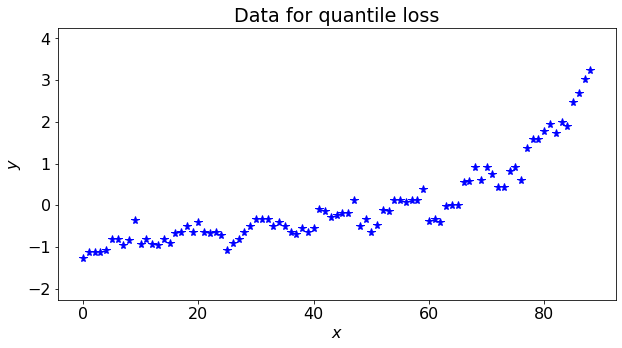

In [41]:
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'Data for quantile loss', 'legend': False,
             'y_lim': [np.min(y)-1, np.max(y)+1]}
fig = plt.subplot(111)
plot_data(X, y, fig, options=plot_opts)

In [42]:
loss_quant_under = QuantileLoss(0.05, Phi, y_train[:,0])
loss_quant_over = QuantileLoss(0.95, Phi, y_train[:, 0])
loss_quant_median = QuantileLoss(0.5, Phi, y_train[:, 0])

In [43]:
learning_rate = 5e-13
tol = 1e-15
n_steps = 10000
beta = 0.99
w_init = np.zeros(Phi.shape[1])

In [44]:
w_quant_under, _, obj_under = gradient_descent_momentum(loss_quant_under, w_init, n_steps=n_steps, learning_rate=learning_rate, tol=tol)
w_quant_over, _, obj_over = gradient_descent_momentum(loss_quant_over, w_init, n_steps=n_steps, learning_rate=learning_rate, tol=tol)
w_quant_median, _, obj_median = gradient_descent_momentum(loss_quant_median, w_init, n_steps=n_steps, learning_rate=learning_rate, tol=tol)

In [45]:
len(obj_under)

10001

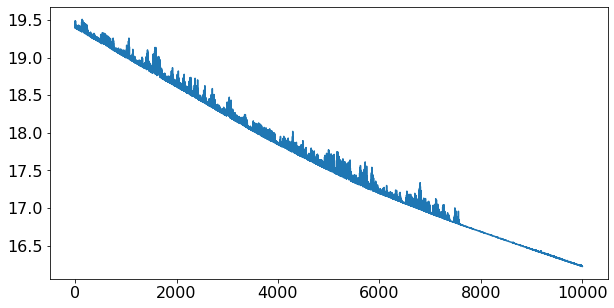

In [46]:
plt.plot(obj_median)

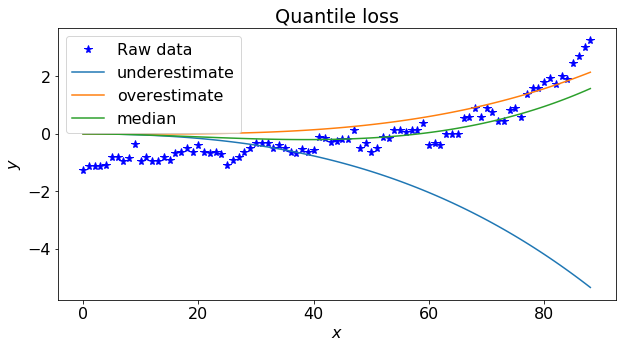

In [47]:
fig = plt.subplot(111)
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'Quantile loss', 'legend': False}#,'y_lim': [np.min(y)-1, np.max(y)+1]}

plot_data(X, y, fig=fig, options=plot_opts)
plot_opts['label'] = 'underestimate'
plot_fit(X, w_quant_under, degree, fig=fig, options=plot_opts)
plot_opts['label'] = 'overestimate'
plot_fit(X, w_quant_over, degree, fig=fig, options=plot_opts)
plot_opts['label'] = 'median'
plot_fit(X, w_quant_median, degree, fig=fig, options=plot_opts)
plt.legend()

In [48]:
degree

3

In [49]:
(y_train[:, 0] < Phi.dot(w_quant_under)).sum()/len(y) 

0.3595505617977528

In [50]:
(y_train[:, 0] < Phi.dot(w_quant_over)).sum()/len(y) 

0.797752808988764

In [51]:
(y_train[:, 0] < Phi.dot(w_quant_median)).sum()/len(y) 

0.6179775280898876